nx=44.0, ny=50.0
[-168.0,180.0]x[-166.27687752661222,173.2050807568877]
[-122.0,134.0]x[-124.53589838486226,131.46410161513774]


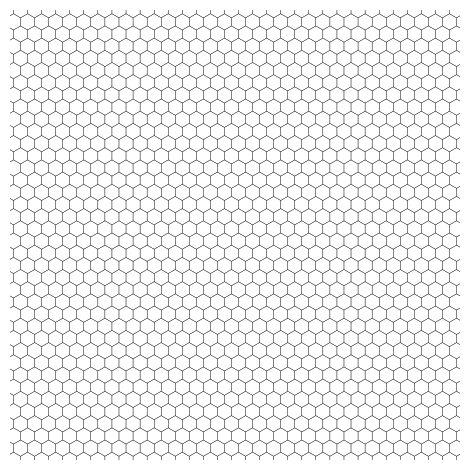

In [1]:
from hexalattice.hexalattice import *
import numpy as np

x_size  = 256
y_size  = 256
x_range = x_size * 1.2
y_range = y_size * 1.2
diam    = 8

# x_size = (1/2 + nx) * diam * sqrt(3)/2  -> (x_size/(diam * sqrt(3)/2))-1/2
# y_size = (1 * 3/4 * ny) * diam          -> (y_size/diam-1)*4/3
nx =np.ceil((x_range/(diam * np.sqrt(3.0)/2.0))-0.5)
ny =np.ceil((y_range/diam-1)*(4.0/3.0))

print("nx="+str(nx)+", ny="+str(ny))

hex_centers, ax = create_hex_grid(nx=nx,
                                  ny=ny,
                                  min_diam=diam,
                                  do_plot=True)
max_x = np.max(hex_centers[:, 0]) 
max_y = np.max(hex_centers[:, 1])
min_x = np.min(hex_centers[:, 0]) 
min_y = np.min(hex_centers[:, 1])

cen_x =(max_x+min_x)/2
cen_y =(max_y+min_y)/2

print("["+str(min_x)+","+str(max_x)+"]x["+str(min_y)+","+str(max_y)+"]")

bound_min_x = cen_x       - x_size/2
bound_max_x = cen_x       + x_size/2
bound_min_y = cen_y       - y_size/2
bound_max_y = cen_y       + y_size/2

print("["+str(bound_min_x)+","+str(bound_max_x)+"]x["+str(bound_min_y)+","+str(bound_max_y)+"]")

ax.axis("off")
plt.xlim(bound_min_x,bound_max_x)       
plt.ylim(bound_min_y,bound_max_y) 
plt.show()    # import matplotlib.pyplot as plt

In [2]:
x_hex_coords = hex_centers[:, 0]
y_hex_coords = hex_centers[:, 1]
image_path = 'D:\\Users\\shums\\kasika\\20240508\\output\\gauss_output.png'     # Works with .png, .jpg, .tif
colors = 255*sample_colors_from_image_by_grid(image_path, x_hex_coords, y_hex_coords)
# print(colors)

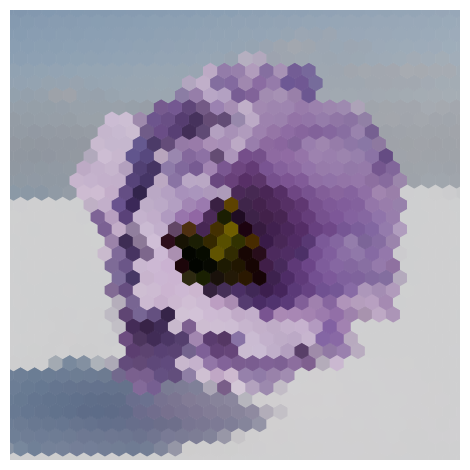

In [4]:
ax = plot_single_lattice_custom_colors(x_hex_coords, y_hex_coords,
                                  face_color  =colors,
                                  edge_color  =colors,
                                  min_diam    =diam*0.99,
                                  plotting_gap=0.05,
                                  rotate_deg  =0)
# print(ax)      
# print(hex_centers)                     
ax.axis("off")
plt.xlim(bound_min_x,bound_max_x)       
plt.ylim(bound_min_y,bound_max_y) 
plt.show()